## Multiclass Classification using a neural network (MLP) with Keras


In [1]:
#select GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0].max()

255

In [6]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


create a validation set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


### Show the digit images

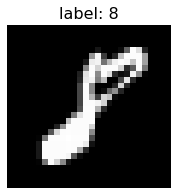

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

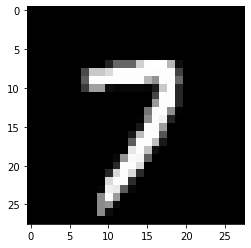

In [9]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [10]:
#the class label of the first training sample
y_train[0]

7

### Define the MLP model

In [11]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model

In [13]:
for epoch in range(0, 20):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    if (epoch+1)%10 == 0:
        model.save('MLP_Keras_e'+str(epoch)+'.h5')

epoch 0
844/844 [==============================] - 6s 6ms/step - loss: 0.3637 - accuracy: 0.8967 - val_loss: 0.1797 - val_accuracy: 0.9457
epoch 1
844/844 [==============================] - 5s 6ms/step - loss: 0.1576 - accuracy: 0.9538 - val_loss: 0.1303 - val_accuracy: 0.9605
epoch 2
844/844 [==============================] - 5s 6ms/step - loss: 0.1101 - accuracy: 0.9673 - val_loss: 0.0951 - val_accuracy: 0.9728
epoch 3
844/844 [==============================] - 5s 6ms/step - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.0821 - val_accuracy: 0.9737
epoch 4
844/844 [==============================] - 5s 6ms/step - loss: 0.0654 - accuracy: 0.9809 - val_loss: 0.0772 - val_accuracy: 0.9770
epoch 5
844/844 [==============================] - 5s 6ms/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 0.0710 - val_accuracy: 0.9760
epoch 6
844/844 [==============================] - 5s 6ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.0734 - val_accuracy: 0.9775
epoch 7
844/844 [==========

### Plot training histroy: loss vs epoch and accuracy vs epoch

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

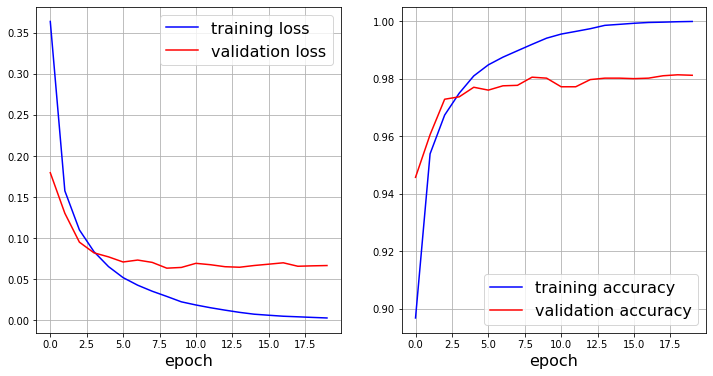

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [16]:
from keras.models import load_model
model = load_model('MLP_Keras_e9.h5')

### Test the model

In [17]:
x_test.shape

(10000, 784)

In [18]:
y_test.shape

(10000,)

In [19]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06664402782917023
Test accuracy: 0.978600025177002


### Make Prediction on the test set

In [20]:
y_test_pred=model.predict(x_test, batch_size=64)

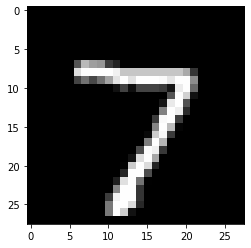

In [21]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [22]:
y_test_pred[0]

array([2.3877824e-08, 2.4232346e-08, 5.8057858e-06, 4.9841208e-05,
       6.0472911e-11, 2.9817767e-07, 5.3744650e-13, 9.9994111e-01,
       9.3856505e-07, 1.9277620e-06], dtype=float32)

In [23]:
np.argmax(y_test_pred[0])

7

In [24]:
y_test[0]

7

In [25]:
np.argmax(y_test[0])

0

## Make Prediction on an image from the user

In [26]:
# load  the image digit_a
from skimage.io import imread
from skimage.color import rgb2gray
I=imread('digit_a.bmp')
I=rgb2gray(I)
I.shape

(30, 27)

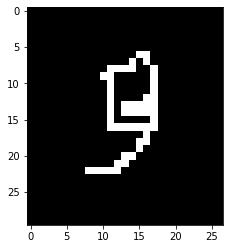

In [27]:
plt.imshow(I, cmap='gray')

In [28]:
#resize the image to 28x28
from skimage.transform import resize
x=resize(I, [28,28])
x.shape

(28, 28)

In [29]:
x.max()

1.0

In [30]:
y_pred=model.predict(x.reshape(1,784))
print('the predicted class label is ', np.argmax(y_pred[0]))

the predicted class label is  9
